<a href="https://colab.research.google.com/github/prikolera/CT_point_cloud_clustering-/blob/main/%D0%A7%D0%B0%D1%80%D1%8B%D0%B5%D0%B2%D0%B0_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Подключение гугл диска, импорт библиотек


In [21]:
# from google.colab import drive
# drive.mount('/content/drive')
import numpy
import csv
# библиотека scipy.special содержит сигмоиду - expit ()
import scipy.special
# библиотека для графического отображения массивов import 
import matplotlib.pyplot

# размещение графики в данном блокноте, а не в отдельном окне
%matplotlib inline

### Обучающий набор

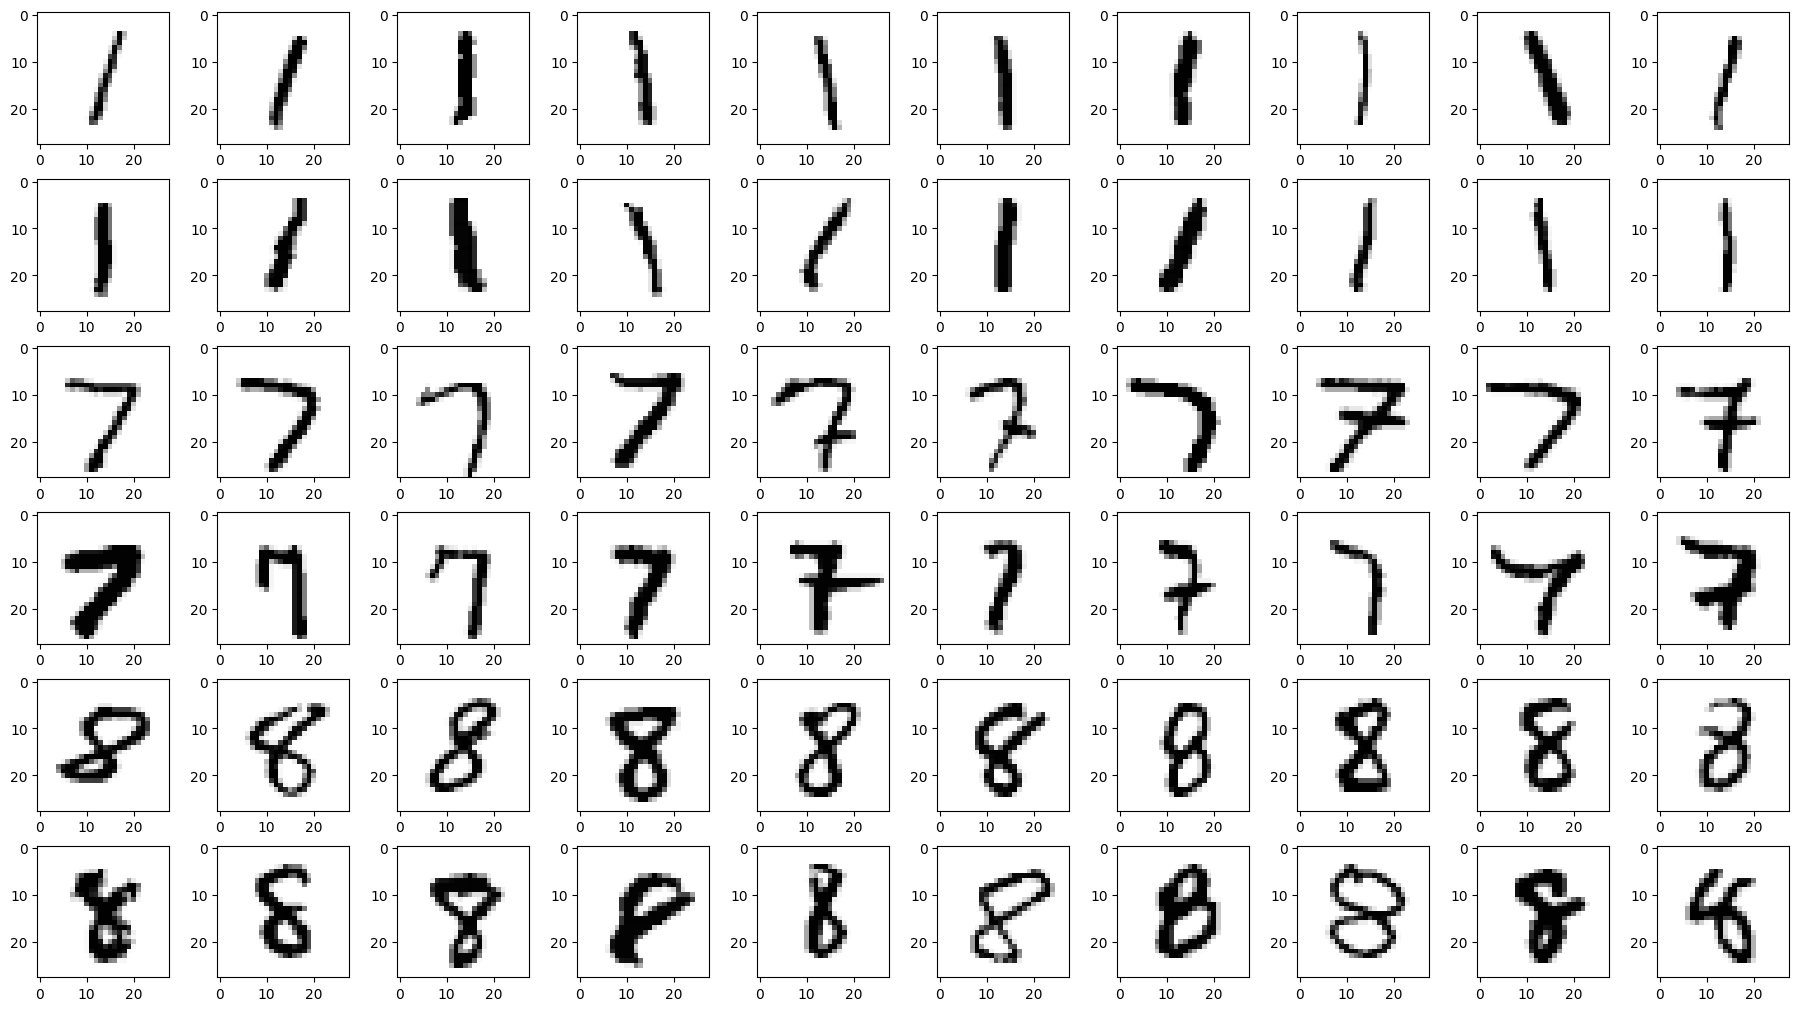

In [22]:
import numpy
# библиотека для графического отображения массивов  
import matplotlib.pyplot as plt
# размещение графики в данном блокноте, а не в отдельном окне
%matplotlib inline
# библиотека для работы с файлами .csv
import csv

# чтение массива обучающих данных (60 примеров)
train_data = []
training_data_file = open('/content/train178.csv', 'r') 
csvreader = csv.reader(training_data_file)
for row in csvreader:
  train_data.append(row)       # формирование массива 748 х 60


# Функция отображения обучающего набора
def show_data_train(data,n,m):
   # расположение рисунков 6 строк по 10 цифр
   fig, axs = plt.subplots(n, m, figsize=(18,10), constrained_layout=True)
   num = 0
   for i in range(n):
      for j in range(m):
         # преобразование массива из 784 чисел к формату 28х28
         image_array=numpy.asfarray(data[num][1:],dtype='int64').reshape((28,28))
         axs[i][j].imshow(image_array, cmap='Greys', interpolation='None')
         num += 1


# Показать набор
show_data_train(train_data,6,10)



### Тестовый набор

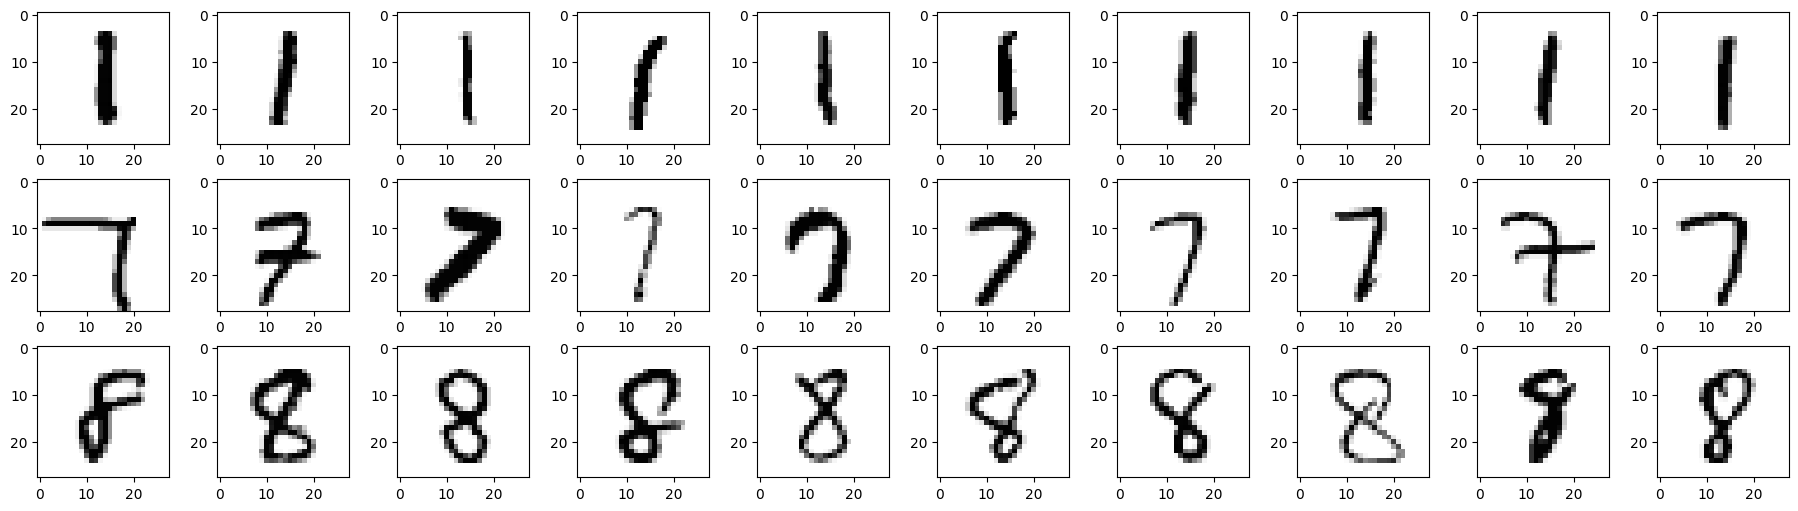

In [23]:
import numpy
# библиотека для графического отображения массивов  
import matplotlib.pyplot as plt
# размещение графики в данном блокноте, а не в отдельном окне
%matplotlib inline
# библиотека для работы с файлами .csv
import csv

test_data_file = open('/content/test178.csv', 'r') 
test_data = []
csvreader = csv.reader(test_data_file)
for row in csvreader:
  test_data.append(row)  

def show_data_test(data,n,m):
   # расположение рисунков 6 строк по 10 цифр
   fig2, axs2 = plt.subplots(n, m, figsize=(18,5), constrained_layout=True)
   num = 0
   for i in range(n):
      for j in range(m):
         # преобразование массива из 784 чисел к формату 28х28
         image_array=numpy.asfarray(data[num][1:],dtype='int64').reshape((28,28))
         axs2[i][j].imshow(image_array, cmap='Greys', interpolation='None')
         num += 1

# Показать набор
show_data_test(test_data,3,10)



### Инициализация нейронной сети

In [24]:
# определение класса нейронной сети 
class neuralNetwork:
    
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество входных узлов и узлов в скрытом и выходном слоях 
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей 
        # wih (между входным и скрытым слоями)и
        # who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j
        # следующего слоя обозначены как  w_i_j
        # w11 w21
        # w12 w22 и т.д. 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # коэффициент скорости обучения
        self.lr = learningrate
        
        # использование сигмоиды в качестве функции активации 
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразование списка входных значений
        # в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        # ошибки выходного слоя (целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах 
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # обновить весовые коэффициенты для связей между скрытым и выходным слоями 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты для связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        return output_errors  
        #pass

    
    # опрос нейронной сети
    def query(self, inputs_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

### Создание экземпляра нейронной сети

In [25]:
# количество входных, скрытых и выходных узлов 
input_nodes = 784
hidden_nodes = 200
output_nodes = 3

# коэффициент скорости обучения 
learning_rate = 0.1

# создать экземпляр нейронной сети
neural = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

### Обучение нейросети

In [26]:
training_data_file = open('/content/train178.csv', 'r') 
training_data_list = training_data_file.readlines()
training_data_file.close()
# тренировка нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети 
epochs = 25
error_epochs = [] # ошибки за эпоху
for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных 
    sum_error = 0   # суммирование ошибок по всем записям 
    for record in training_data_list:
        # получить список значений из записи, используя символы
        # запятой ',' в качестве разделителей 
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0.01, 
        # за исключением желаемого маркерного значения, равного 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # print(targets)
        # all_values[0] - целевое маркерное значение для данной записи
        # print ("all val ",all_values[0])
        number= all_values[0]
        
        if int(number)==1:
          index = 0
        elif int(number)==7:
          index = 1
        elif int(number)==8:
          index=2

        # targets[int(all_values[0])] = 0.99
        targets[index] = 0.99
        errors = neural.train(inputs, targets) # ошибки вых. слоя на тек. эпохе
        e = numpy.linalg.norm(errors) # норма L2 вектора ошибок (СКО)
        sum_error = sum_error + e     # суммир. ошибок по всем записям 
        pass
    error_epochs.append(sum_error/60)  # массив СКО за каждую эпоху
    pass



### График ошибки обучения

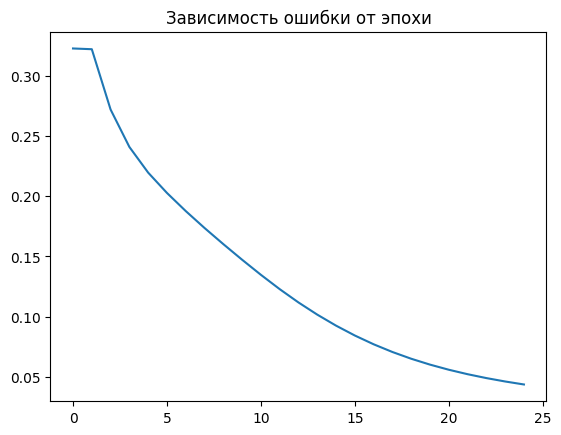

In [27]:
matplotlib.pyplot.plot(error_epochs)
# показываем график 
matplotlib.pyplot.title('Зависимость ошибки от эпохи') 
matplotlib.pyplot.show()

### Тестирование на обучающей выборке

In [39]:
train_data_file = open("/content/train178.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard_text = []
scorecard = []

# перебрать все записи в тестовом наборе данных 
for record in train_data_list:
    # получить список значений из записи, используя символы
    # запятой ','в качестве разделителей 
    all_values = record.split(',')
    # правильный ответ - первое значение 
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = neural.query(inputs)
    # print("Outputs is ", outputs)
    # индекс наибольшего значения является маркерным значением 
    label = numpy.argmax(outputs)
    if label==0:
      label=1
    elif label==1:
      label=7
    elif label==2:
      label=8
    print("Исходное число",correct_label,"  Нейросеть", label)
    # добавить оценку ответа сети в конец списка 
    if (label == correct_label):
        # в случае правильного ответа сети добавить к списку значение +
        scorecard_text.append('+')
        scorecard.append(1)

    else:
        # в случае неправильного ответа сети добавить к списку значение -
        scorecard_text.append('-')
        scorecard.append(0)

        pass
    
    pass

# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
# print(scorecard_text)
print ("Точность = ", scorecard_array.sum() / scorecard_array.size * 100, "%")

Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное

### Тестирование на тестовой выборке

In [37]:
test_data_file = open("/content/test178.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard_text = []
scorecard = []

# перебрать все записи в тестовом наборе данных 
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой ','в качестве разделителей 
    all_values = record.split(',')
    # правильный ответ - первое значение 
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # print(inputs)
    # опрос сети
    outputs = neural.query(inputs)
    # индекс наибольшего значения является маркерным значением 
    label = numpy.argmax(outputs)
    if label==0:
      label=1
    elif label==1:
      label=7
    elif label==2:
      label=8
    # добавить оценку ответа сети в конец списка 
    if (label == correct_label):
        # в случае правильного ответа сети добавить к списку значение +
        scorecard_text.append('+')
        scorecard.append(1)
        print("Исходное число",correct_label,"  Нейросеть", label)

    else:
        # в случае неправильного ответа сети добавить к списку значение -
        scorecard_text.append('-')
        scorecard.append(0)
        print("Исходное число",correct_label,"  Нейросеть", label,"ОШИБКА!")
        image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
        error_title = f'Определено число {label} вместо {correct_label}'
        matplotlib.pyplot.title(error_title) 
        matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
        

        pass
    
    pass

# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
# print(scorecard_text)
print ("Точность = ", scorecard_array.sum() / scorecard_array.size * 100, "%")

Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 1   Нейросеть 1
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 7   Нейросеть 7
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Исходное число 8   Нейросеть 8
Точность =  100.0 %


### Тестирование на изображении числа

#### Исходное изображение числа!

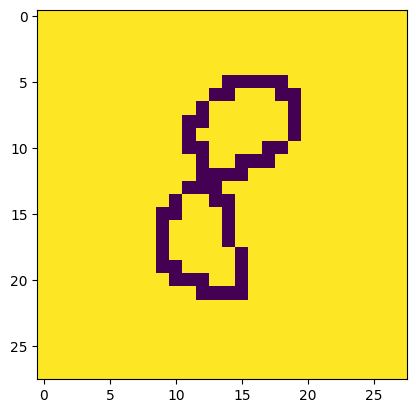

In [43]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/8.png")
# # Конвертация в Gray
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
matplotlib.pyplot.imshow(image, interpolation='None')

#### Распознавание числа

In [44]:
# image_array=numpy.array(image).reshape(784,1)

height=numpy.size(image,0)
weight=numpy.size(image,1)


my_image =''
for r in range(height):
  for t in range(weight):
    out = image[r][t]
    string = f'{out},'
    my_image += string

my_image = my_image[:-1]
all_values = my_image.split(',')
inputs = (numpy.asfarray(all_values[0:]) / 255.0 * 0.99) + 0.01
outputs = neural.query(inputs)
# индекс наибольшего значения является маркерным значением 
label = numpy.argmax(outputs)
if label==0:
  label=1
elif label==1:
  label=7
elif label==2:
  label=8
print("Число определенное нейросетью - ", label)

Число определенное нейросетью -  8
